# Tutoriel Soft Computing - Comprendre les métrices de classification supervisée
## Créons un jeu de données de personnes enceintes (y=1) et d'autres non (y=0)
## Imaginons que nous avons fait un modèle (y_score) et que nous avons obtenu une prédiction (y_pred) à un seuil de proba défini à 0.2
## Damien GARROUSTE 2019

In [1]:
# créer le jeu de données avec 20% de pregnants et 80% de non pregnants + prédiction avec plus de pregnat prédits ()

import numpy as np
# créer 45 non pregnant
lval0=list(np.repeat(0,40))
# créer 10 pregnant (20%)
lval1=list(np.repeat(1,10))
lscore0=list(np.repeat(0.05,40))
lscore1=list(np.repeat(0.7,10))
#l[0:2]
# on concatene les 50 + 10 erreurs on rajoute quelques erreurs fp et fn mais avec une majorité de faux positifs (des 0  classés 1)
# on passe en numpy array pour faire des calculs
y_true = np.array(lval0+lval1+[0,0,1,0,0,0,0,0,0,0])
# probas en se basant sur un cutoff à 0.2
y_score = np.array(lscore0+lscore1+[0.35, 0.24, 0.08, 0.7,0.25,0.29,0.7,0.6,0.4,0.32])
y_pred = np.array(lval0+lval1+[0,1,0,1,1,1,1,1,1,1 ])

C:\Users\dgr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# nombre d'individus
print(len(y_true),len(y_pred),len(y_score))
# moyenne de la cible obs et prédite : on prédit plus de 1 !
print(y_true.mean(),y_pred.mean())

60 60 60
0.18333333333333332 0.3


In [3]:
# matrice de confusion manuelle
import pandas as pd
print(pd.crosstab(np.array(y_true),np.array(y_pred)))
print(pd.crosstab(np.array(y_true),np.array(y_pred), normalize='index'))
# on prédit 18 pregnants sur 60 soit 30% alors qu'il y a 20% dans la base de connaissance
# le modèle donc tend à créer des faux positifs 

col_0   0   1
row_0        
0      41   8
1       1  10
col_0         0         1
row_0                    
0      0.836735  0.163265
1      0.090909  0.909091


In [4]:
# matrice de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[41,  8],
       [ 1, 10]], dtype=int64)

In [5]:
#extraire les valeurs 
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

[[41  8]
 [ 1 10]]
[[0.84 0.16]
 [0.09 0.91]]


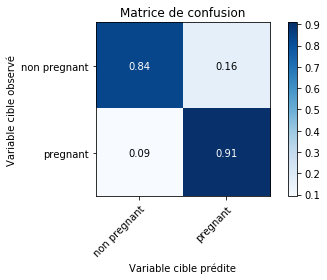

In [12]:
# répresenter la matrice de confusion

import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,                       
                          title=None,
                          cmap=plt.cm.Blues):
   
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    print(cm)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Variable cible observé',
           xlabel='Variable cible prédite')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=["non pregnant","pregnant"], 
                      title='Matrice de confusion')

## métrics basés sur un cutoff : la métrique est calculable si le modèle a déjà pris une décision (au dela d'un cutoff je prédis 1)

In [11]:

# dans y_pred il doit y avoir 0/1 pas une proba
from sklearn.metrics import f1_score,recall_score,log_loss,accuracy_score, precision_score
print("f1",f1_score(y_true, y_pred, average='binary') ,"recall",recall_score(y_true, y_pred) ,"accuracy",accuracy_score(y_true, y_pred) )

f1 0.6896551724137931 recall 0.9090909090909091 accuracy 0.85


## métrics quantités qui ne dépendent pas d'un cutoff : la métrique est calculable à partir des probas/scores

In [9]:
#Log loss, aka logistic loss or cross-entropy loss.
#This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions. 
#The log loss is only defined for two or more labels. For a single sample with true label yt in {0,1} and estimated probability yp that yt = 1, the log loss is

# on met les probas
log_loss(y_true,y_score)

0.22833877412490627

In [ ]:
accuracy_score(y_true,y_pred)

In [86]:
# métrics non basés surun cut off
from sklearn.metrics import roc_auc_score,roc_curve,average_precision_score


# AUC
roc_auc_score(y_true,y_score)

0.9647495361781077

In [87]:
# a precision-recall curve as the weighted mean of precisions achieved at each threshold,
average_precision_score(y_true,y_score)

0.8075757575757576

In [14]:
# arnre de décision visualiser

from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier()
iris = load_iris()

In [15]:
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf,out_file='tree.dot')  